Driver Auto Pilot

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [3]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [4]:
ls

AutoDriver.xls  EVTest.csv  ltOCV.xls  LUS_covid.csv  Maldata.csv


In [5]:
#importing pandas as pd 
import pandas as pd 
  
# Read and store content 
# of an excel file  
read_file = pd.read_excel ("/content/gdrive/My Drive/kaggle/AutoDriver.xls") 
  
# Write the dataframe object 
# into csv file 
read_file.to_csv ("/content/gdrive/My Drive/kaggle/Adriver.csv",  
                  index = None, 
                  header=True) 
    
# read csv file and convert  
# into a dataframe object 
df = pd.DataFrame(pd.read_csv("/content/gdrive/My Drive/kaggle/Adriver.csv")) 
  
# show the dataframe 
df

,ID,Condition,ConditionName,Gender,Event,EventName,TakeOverType,TakeOverRT,PreTORAttentionAlert,MaxLaneDeviation(ft),SteerRT(s),ThrottleRT(s),BrakeRT(s)
0,100,3,attentional maintenance,M,4,dropout 2,dropout,0.200000,False,4.458362,0.260,0.480,NaN
1,100,3,attentional maintenance,M,3,work zone 2,steering,2.133333,True,0.328173,0.292,0.420,0.320
2,100,3,attentional maintenance,M,2,work zone 1,steering,2.450000,False,0.641524,0.372,0.560,NaN
3,100,3,attentional maintenance,M,1,dropout 1,dropout,0.166667,False,4.232623,0.276,0.596,NaN
4,103,1,baseline,M,4,dropout 2,dropout,0.166667,False,4.749232,0.252,1.124,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,198,1,baseline,M,1,dropout 1,dropout,0.166667,False,4.343349,0.328,0.496,0.420
83,198,2,state-contingent takeover,F,4,dropout 2,dropout,0.166667,True,4.200699,0.260,0.488,NaN
84,198,2,state-contingent takeover,F,3,work zone 2,brake,1.300000,False,0.310272,0.304,0.540,0.232
85,198,2,state-contingent takeover,F,2,work zone 1,brake,1.400000,False,0.221061,0.280,0.892,0.268


In [6]:
print(df.head())

    ID  Condition  ... ThrottleRT(s) BrakeRT(s)
0  100          3  ...         0.480        NaN
1  100          3  ...         0.420       0.32
2  100          3  ...         0.560        NaN
3  100          3  ...         0.596        NaN
4  103          1  ...         1.124        NaN

[5 rows x 13 columns]


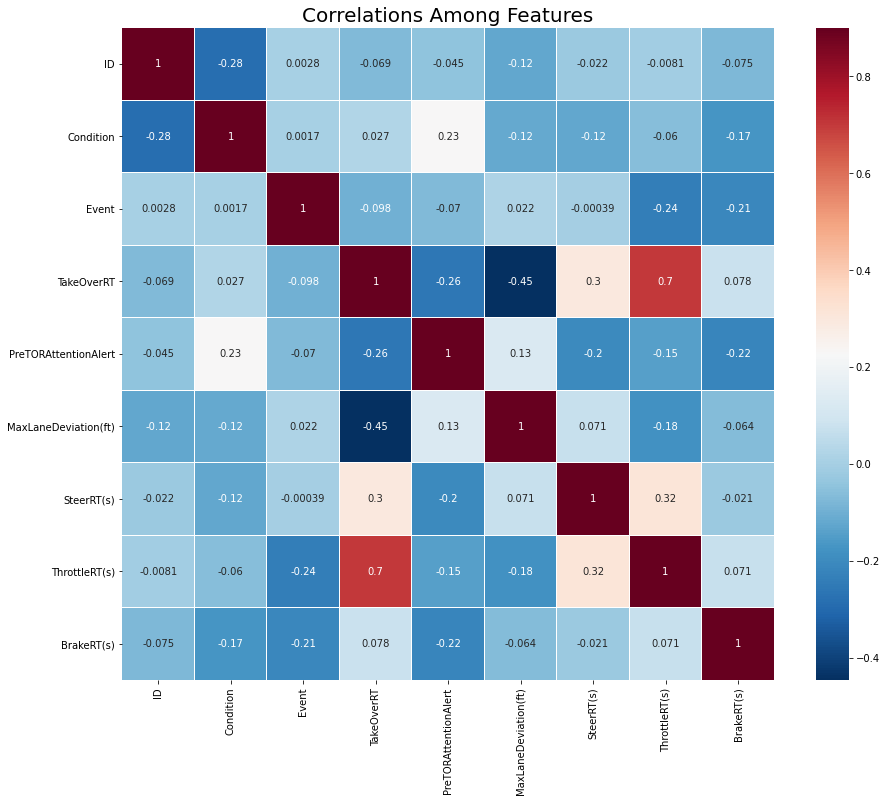

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os

plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
print(df.shape)
df.head()

(87, 13)


,ID,Condition,ConditionName,Gender,Event,EventName,TakeOverType,TakeOverRT,PreTORAttentionAlert,MaxLaneDeviation(ft),SteerRT(s),ThrottleRT(s),BrakeRT(s)
0,100,3,attentional maintenance,M,4,dropout 2,dropout,0.200000,False,4.458362,0.260,0.480,NaN
1,100,3,attentional maintenance,M,3,work zone 2,steering,2.133333,True,0.328173,0.292,0.420,0.32
2,100,3,attentional maintenance,M,2,work zone 1,steering,2.450000,False,0.641524,0.372,0.560,NaN
3,100,3,attentional maintenance,M,1,dropout 1,dropout,0.166667,False,4.232623,0.276,0.596,NaN
4,103,1,baseline,M,4,dropout 2,dropout,0.166667,False,4.749232,0.252,1.124,NaN


In [13]:
for column in df:
    print(column)
    print(df[column].isnull().sum().sum())

ID
0
Condition
0
ConditionName
0
Gender
0
Event
0
EventName
0
TakeOverType
0
TakeOverRT
0
PreTORAttentionAlert
0
MaxLaneDeviation(ft)
0
SteerRT(s)
0
ThrottleRT(s)
1
BrakeRT(s)
38


In [14]:
df.dropna(inplace=True)

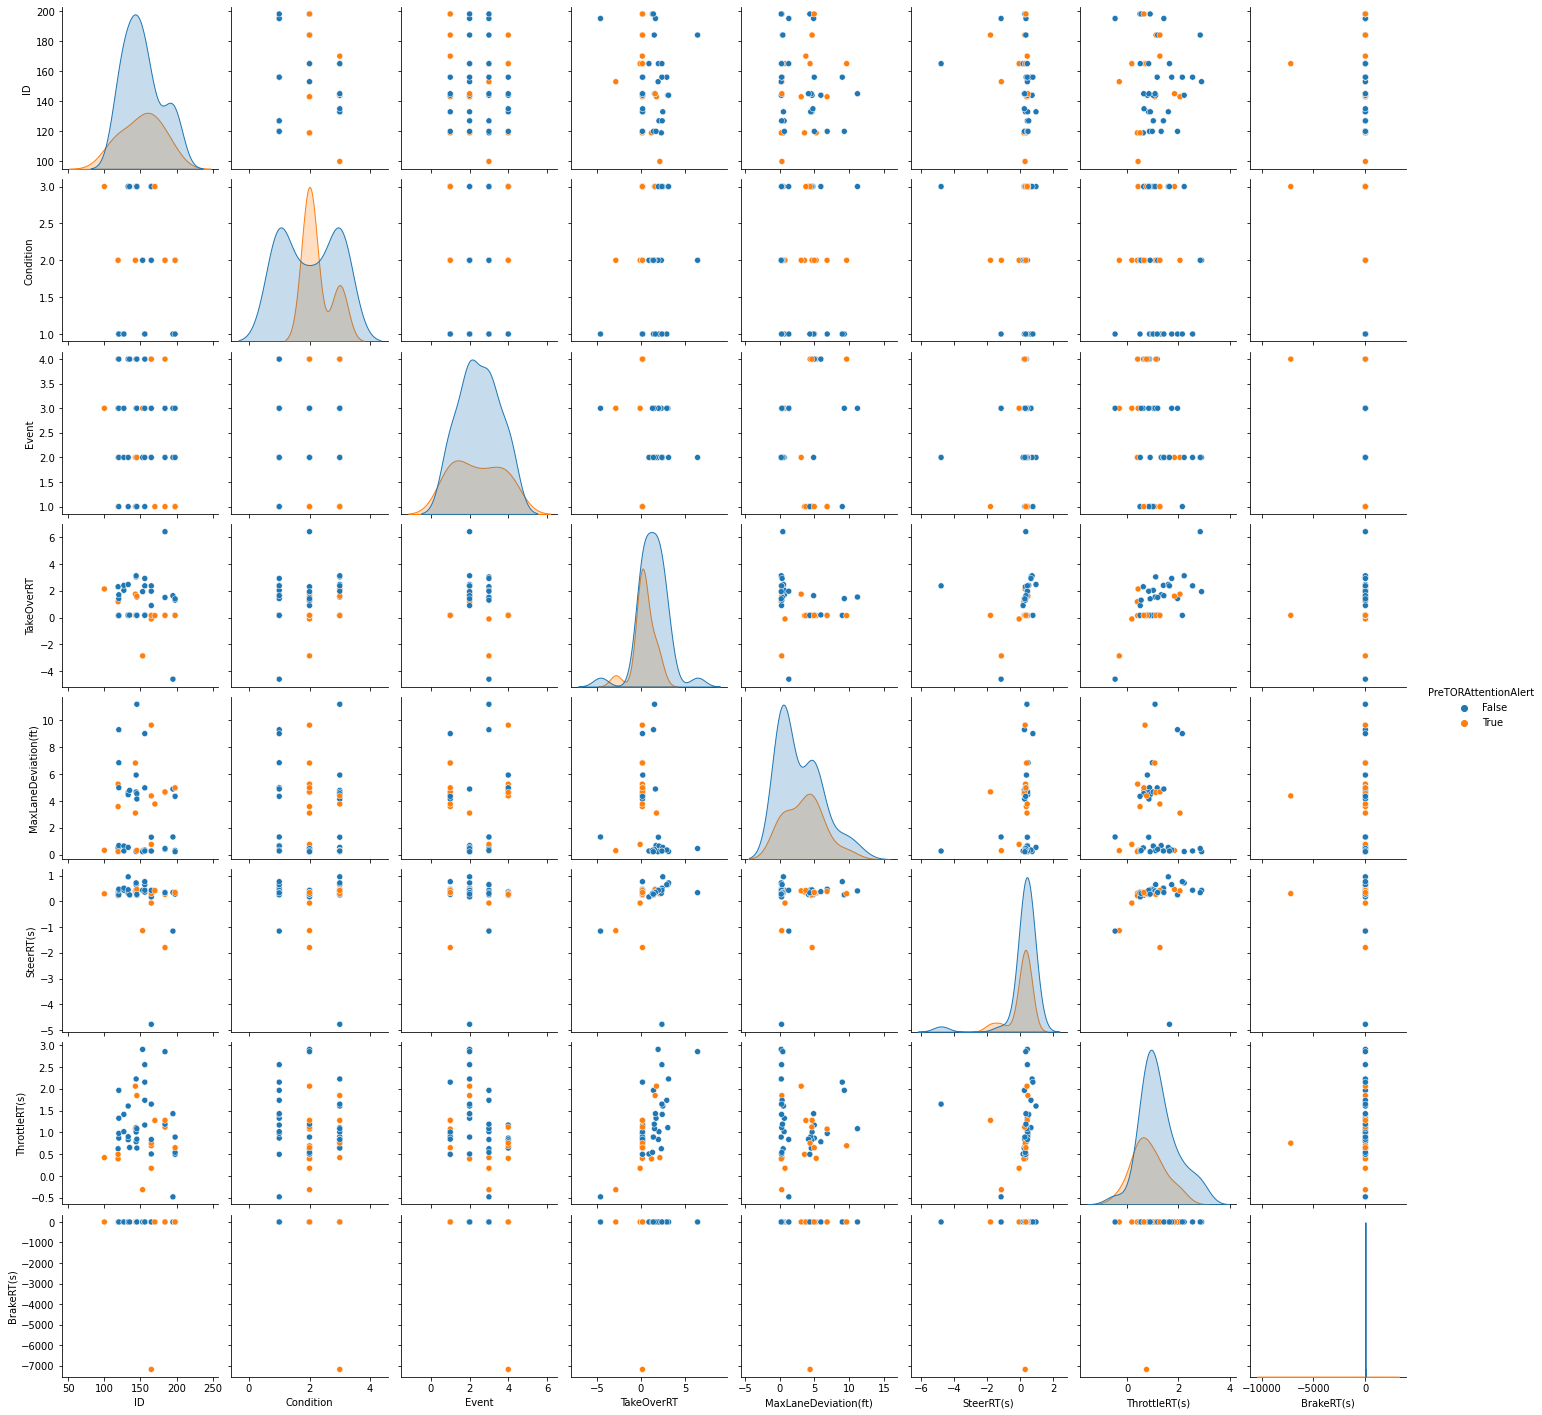

In [16]:
sns.pairplot(df, hue='PreTORAttentionAlert')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [22]:
x = df[['TakeOverRT', 'MaxLaneDeviation(ft)', 'SteerRT(s)']] 			
y = df['PreTORAttentionAlert']

In [23]:
x.shape, y.shape

((48, 3), (48,))

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_lr = logistic.predict(x_test)
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

       False       0.67      1.00      0.80         8
        True       0.00      0.00      0.00         4

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

       False       0.70      0.88      0.78         8
        True       0.50      0.25      0.33         4

    accuracy                           0.67        12
   macro avg       0.60      0.56      0.56        12
weighted avg       0.63      0.67      0.63        12



In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

       False       0.67      0.75      0.71         8
        True       0.33      0.25      0.29         4

    accuracy                           0.58        12
   macro avg       0.50      0.50      0.50        12
weighted avg       0.56      0.58      0.57        12



In [28]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(x_train,y_train)
prediction_xgb = xgb.predict(x_test)
print(classification_report(y_test, prediction_xgb))

              precision    recall  f1-score   support

       False       0.64      0.88      0.74         8
        True       0.00      0.00      0.00         4

    accuracy                           0.58        12
   macro avg       0.32      0.44      0.37        12
weighted avg       0.42      0.58      0.49        12



In [29]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout

In [30]:
model = Sequential([
    Dense(32, activation='relu', input_dim=3),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(x_train, y_train, batch_size=10, epochs=10,verbose=2)

Epoch 1/10
4/4 - 1s - loss: 0.2750 - accuracy: 0.3889
Epoch 2/10
4/4 - 0s - loss: 0.2873 - accuracy: 0.5833
Epoch 3/10
4/4 - 0s - loss: 0.2614 - accuracy: 0.5833
Epoch 4/10
4/4 - 0s - loss: 0.2280 - accuracy: 0.6944
Epoch 5/10
4/4 - 0s - loss: 0.2286 - accuracy: 0.5833
Epoch 6/10
4/4 - 0s - loss: 0.2263 - accuracy: 0.6389
Epoch 7/10
4/4 - 0s - loss: 0.2190 - accuracy: 0.6389
Epoch 8/10
4/4 - 0s - loss: 0.2160 - accuracy: 0.6944
Epoch 9/10
4/4 - 0s - loss: 0.2376 - accuracy: 0.6389
Epoch 10/10
4/4 - 0s - loss: 0.2133 - accuracy: 0.6944


In [32]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


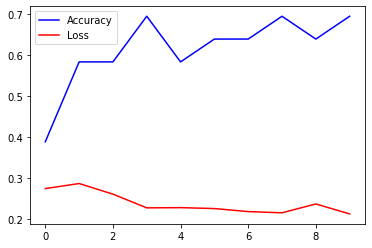

In [33]:
plt.plot(history.history['accuracy'], label='Accuracy', color='blue')
plt.plot(history.history['loss'], label='Loss', color='red')
plt.legend()


In [34]:
prediction_nn = model.predict(x_test)
prediction_nn = [1 if y>=0.5 else 0 for y in prediction_nn]
print(classification_report(y_test, prediction_nn))

              precision    recall  f1-score   support

       False       0.73      1.00      0.84         8
        True       1.00      0.25      0.40         4

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg       0.82      0.75      0.69        12

